In [1]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,472 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direc

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


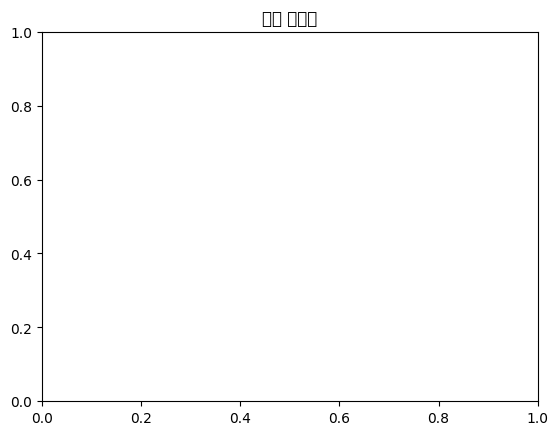

In [2]:
import matplotlib.pyplot as plt

# 폰트 적용
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 테스트
plt.title('한글 테스트')
plt.show()

In [3]:
import json
import os

# 파일 경로 설정 (코랩이나 로컬 환경의 경로에 맞게 수정 가능)
file_path = 'musinsa_result.json'

# 파일 존재 여부 확인
if not os.path.exists(file_path):
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
else:
    try:
        # 파일 읽기 시도 (UTF-8 인코딩 명시)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        # 1. 로드 성공 메시지 및 데이터 타입 확인
        print("✅ 파일 읽기 성공!")
        print(f"데이터 타입: {type(data)}")

        # 2. 데이터 개수 확인 (리스트인 경우)
        if isinstance(data, list):
            print(f"총 아이템 개수: {len(data)}개")

            # 3. 데이터 샘플 확인 (첫 번째 항목 출력)
            if len(data) > 0:
                print("\n--- 첫 번째 아이템 미리보기 ---")
                # 보기 좋게 들여쓰기(indent)하여 출력
                print(json.dumps(data[0], indent=4, ensure_ascii=False))
            else:
                print("데이터 리스트가 비어 있습니다.")
        else:
            print("데이터가 리스트 형식이 아닙니다. 최상위 키:", data.keys())

    except json.JSONDecodeError as e:
        print(f"❌ JSON 파싱 오류: 파일 내용이 올바른 JSON 형식이 아닙니다.\n에러 내용: {e}")
    except Exception as e:
        print(f"❌ 알 수 없는 오류 발생: {e}")

오류: 'musinsa_result.json' 파일을 찾을 수 없습니다. 경로를 확인해주세요.


In [5]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
from wordcloud import WordCloud

# 1. 데이터 로드
file_path = 'musinsa_result.json'  # 업로드한 파일명

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    print(f"데이터 로드 성공: 총 {len(data)}개의 아이템이 있습니다.")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 왼쪽 파일 탭에 json 파일을 업로드했는지 확인해주세요.")

# 2. 태그 추출 및 빈도 계산
all_tags = []
for item in data:
    if 'tags' in item:
        all_tags.extend(item['tags'])

# 빈도수 계산
tag_counts = Counter(all_tags)
print(f"총 발견된 고유 태그 수: {len(tag_counts)}개")

# 상위 20개 태그 확인
top_20_tags = tag_counts.most_common(20)
df = pd.DataFrame(top_20_tags, columns=['Tag', 'Count'])

# 3. 시각화 (막대 그래프)
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Count', y='Tag', palette='viridis')
plt.title('상위 20개 태그 빈도 분석')
plt.xlabel('빈도수')
plt.ylabel('태그')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. 시각화 (워드클라우드)
# 윈도우/코랩 환경에 맞는 폰트 경로 지정 (코랩은 NanumBarunGothic)
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path=font_path,
               background_color="white",
               width=1000,
               height=600,
               max_words=100,
               max_font_size=200)

wc.generate_from_frequencies(tag_counts)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('태그 워드클라우드')
plt.show()

파일을 찾을 수 없습니다. 왼쪽 파일 탭에 json 파일을 업로드했는지 확인해주세요.


NameError: name 'data' is not defined